<a href="https://colab.research.google.com/github/unicamp-dl/IA025_2022S1/blob/main/ex04_extra/larissa_santesso/Exercicio_aula4_plot_otimo_batch_iris_LarissaSantesso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Larissa Antonelli Santesso 

In [ ]:
import numpy as np
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

from torchvision import transforms

from sklearn.datasets import load_iris
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_data = data[:,0:1]
target = data[:,1:2]
n_samples = x_data.shape[0]

print('dimensões de x_data:', x_data.shape)
print('dimensões de target:', target.shape)

dimensões de x_data: (50, 1)
dimensões de target: (50, 1)


In [ ]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(target)
xt_min = x_train.min()
xt_max = x_train.max()
x_train_n = (x_train - xt_min)/(xt_max - xt_min)

yt_min = y_train.min()
yt_max = y_train.max()
y_train_n = (y_train - yt_min)/(yt_max - yt_min)

In [ ]:
x_train_bias = torch.cat([torch.ones(size=(n_samples,1)), x_train_n], dim=1)
print(x_train_bias.shape)

torch.Size([50, 2])


In [ ]:
dataset = TensorDataset(x_train_bias, y_train_n)

In [ ]:

data_loader = DataLoader(dataset, 
                         batch_size=10, # tamanho do mini-batch de dados
                         shuffle=True) # se for True, embaralha os dados no inicio de cada iteração

Solução ótima

In [ ]:
x_bias, y = next(iter(data_loader))

In [ ]:
w_opt = (torch.inverse(x_bias.t().mm(x_bias)).mm(x_bias.t())).mm(y)
print(w_opt.t(), w_opt.shape)

tensor([[0.1079, 0.9441]]) torch.Size([2, 1])


# Exercício é codificar a próxima célula:

In [ ]:
print(f"x_bias.shape = {x_bias.shape}")
print(f"x_bias.t().shape = {x_bias.t().shape}")
print(f"y.shape = {y.shape}")

x_bias.shape = torch.Size([10, 2])
x_bias.t().shape = torch.Size([2, 10])
y.shape = torch.Size([10, 1])


In [ ]:
wlist = []
for i in range(1000):
    for x_bias, y in data_loader:
        w_opt_batch = (torch.inverse(x_bias.t().mm(x_bias)).mm(x_bias.t())).mm(y)
        wlist.append(w_opt_batch)

In [ ]:
w_opt = (torch.stack(wlist,dim=0)).squeeze(0)
w_opt[:,0].shape

torch.Size([5000, 1])

In [ ]:
wlist

[tensor([[0.2235],
         [0.7280]]), tensor([[0.3164],
         [0.7172]]), tensor([[0.3106],
         [0.5875]]), tensor([[0.0481],
         [1.1816]]), tensor([[0.2683],
         [0.6006]]), tensor([[0.1912],
         [0.7601]]), tensor([[0.2200],
         [0.8058]]), tensor([[0.2174],
         [0.7188]]), tensor([[0.2718],
         [0.6185]]), tensor([[0.5284],
         [0.3283]]), tensor([[0.3493],
         [0.4935]]), tensor([[0.1822],
         [0.6848]]), tensor([[0.3181],
         [0.6109]]), tensor([[0.3507],
         [0.6205]]), tensor([[0.0494],
         [1.3050]]), tensor([[0.1194],
         [0.8552]]), tensor([[0.2157],
         [0.7496]]), tensor([[0.3498],
         [0.5158]]), tensor([[0.3726],
         [0.4870]]), tensor([[0.2067],
         [0.8760]]), tensor([[0.3166],
         [0.5358]]), tensor([[0.2799],
         [0.6304]]), tensor([[0.1823],
         [0.9746]]), tensor([[0.2064],
         [0.7613]]), tensor([[0.2570],
         [0.6960]]), tensor([[0.3892],
      

In [ ]:
w_opt[:,0]

tensor([[0.2235],
        [0.3164],
        [0.3106],
        ...,
        [0.2201],
        [0.4539],
        [0.2080]])

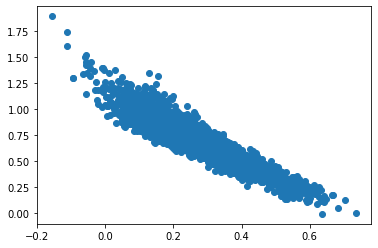

In [ ]:
#w_opt = torch.cat(wlist)
w_opt = (torch.stack(wlist,dim=0)).squeeze(0)
plt.scatter(w_opt[:,0], w_opt[:,1])

# Resultado esperado

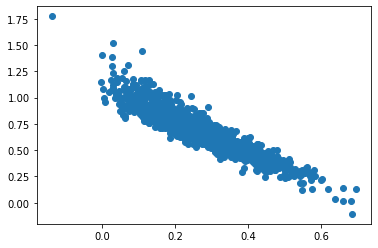

In [ ]:
#w_opt = torch.cat(wlist)
#plt.scatter(w_opt[:,0], w_opt[:,1])